In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

**Working with Training Dataset**

In [2]:
#loading train dataset from csv file
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Job-a-thon/train_Df64byy.csv')
df.head(10)        #displaying the top  10 rows

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1


In [ ]:
# all the columns and their explanation
'''
Variable	                          Definition
ID	                                Unique Identifier for a row
City_Code	                          Code for the City of the customers
Region_Code	                        Code for the Region of the customers
Accomodation_Type	                  Customer Owns or Rents the house
Reco_Insurance_Type	                Joint or Individual type for the recommended insurance  
Upper_Age	                          Maximum age of the customer 
Lower _Age	                        Minimum age of the customer
Is_Spouse	                          If the customers are married to each other (in case of joint insurance) 
Health_Indicator                    Encoded values for health of the customer
Holding_Policy_Duration	            Duration (in years) of holding policy (a policy that customer has already subscribed to with the company)
Holding_Policy_Type                 Type of holding policy
Reco_Policy_Cat	                    Encoded value for recommended health insurance
Reco_Policy_Premium	                Annual Premium (INR) for the recommended health insurance
'''

'\nVariable\t                          Definition\nID\t                                Unique Identifier for a row\nCity_Code\t                          Code for the City of the customers\nRegion_Code\t                        Code for the Region of the customers\nAccomodation_Type\t                  Customer Owns or Rents the house\nReco_Insurance_Type\t                Joint or Individual type for the recommended insurance  \nUpper_Age\t                          Maximum age of the customer \nLower _Age\t                        Minimum age of the customer\nIs_Spouse\t                          If the customers are married to each other (in case of joint insurance) \nHealth_Indicator                    Encoded values for health of the customer\nHolding_Policy_Duration\t            Duration (in years) of holding policy (a policy that customer has already subscribed to with the company)\nHolding_Policy_Type                 Type of holding policy\nReco_Policy_Cat\t                    Encoded

target variable: **Response** - 	
* 0 : Customer did not show interest in the recommended policy
* 1 : Customer showed interest in the recommended policy

**EDA- Exploratory Data Analysis**

In [3]:
df.info()    #information of rows n columns   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [4]:
df.shape     # displaying the shape of datset

(50882, 14)

In [5]:
df.dtypes #datatypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [6]:
df.isnull().sum() #checking null values

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [7]:
df.apply(lambda x: len(x.unique())) #checking for unique values

ID                         50882
City_Code                     36
Region_Code                 5316
Accomodation_Type              2
Reco_Insurance_Type            2
Upper_Age                     58
Lower_Age                     60
Is_Spouse                      2
Health Indicator              10
Holding_Policy_Duration       16
Holding_Policy_Type            5
Reco_Policy_Cat               22
Reco_Policy_Premium         6977
Response                       2
dtype: int64

* **Continuous columns** : ID, Upper_Age, Lower_Age, Reco_Policy_Premium 
* **Categorical Columns**: City_Code, Region_Code, Accomodation_Type,   Reco_Insurance_Type, Is_Spouse, Health Indicator,  Holding_Policy_Duration, Holding_Policy_Type, Reco_Policy_Cat

In [8]:
df.describe().T #5 point summary

,count,mean,std,min,25%,50%,75%,max
ID,50882.0,25441.500000,14688.512535,1.0,12721.25,25441.5,38161.75,50882.0
Region_Code,50882.0,1732.788707,1424.081652,1.0,523.00,1391.0,2667.00,6194.0
Upper_Age,50882.0,44.856275,17.310271,18.0,28.00,44.0,59.00,75.0
Lower_Age,50882.0,42.738866,17.319375,16.0,27.00,40.0,57.00,75.0
Holding_Policy_Type,30631.0,2.439228,1.025923,1.0,1.00,3.0,3.00,4.0
Reco_Policy_Cat,50882.0,15.115188,6.340663,1.0,12.00,17.0,20.00,22.0
Reco_Policy_Premium,50882.0,14183.950069,6590.074873,2280.0,9248.00,13178.0,18096.00,43350.4
Response,50882.0,0.239947,0.427055,0.0,0.00,0.0,0.00,1.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


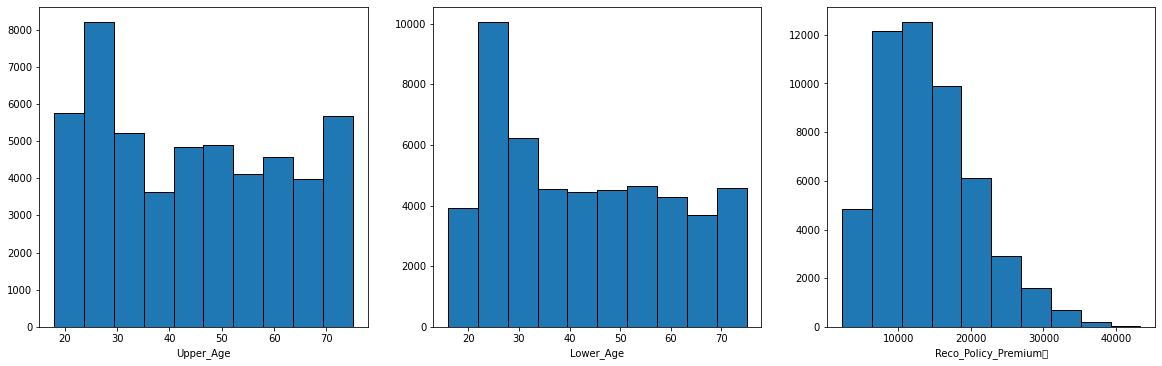

In [9]:
# frequency distribution of continuous columns by histogram
plt.figure(figsize= (20,20))

plt.subplot(3,3,1)
plt.hist(df.Upper_Age,edgecolor='black') 
plt.xlabel('Upper_Age')       #upper Age

plt.subplot(3,3,2)
plt.hist(df.Lower_Age, edgecolor='black')
plt.xlabel('Lower_Age')       #lower age

plt.subplot(3,3,3)
plt.hist(df.Reco_Policy_Premium	, edgecolor='black')
plt.xlabel('Reco_Policy_Premium	')      #reco policy premium

plt.show()


upper age and lower age are almost uniformally distributed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

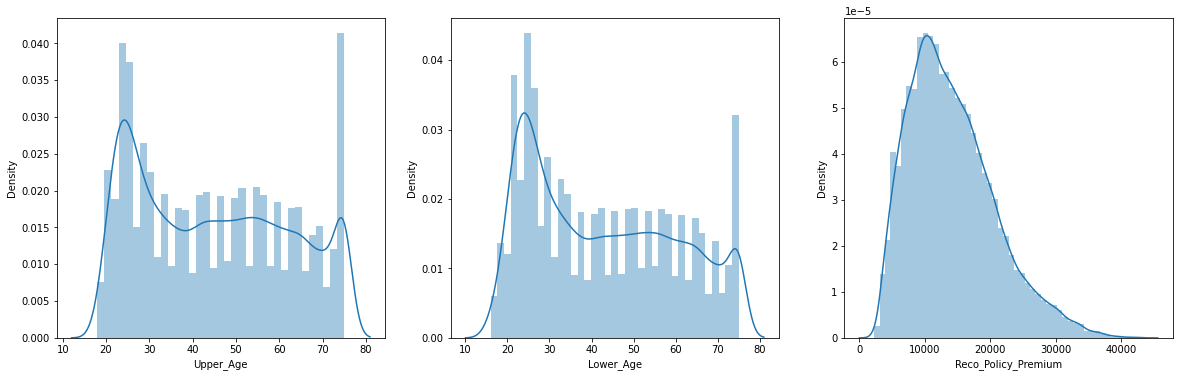

In [10]:
# distribution of continuous columns using sns distplot
plt.figure(figsize= (20,20))
plt.subplot(3,3,1)
sns.distplot(df.Upper_Age,kde=True)

plt.subplot(3,3,2)
sns.distplot(df.Lower_Age,kde=True)

plt.subplot(3,3,3)
sns.distplot(df.Reco_Policy_Premium,kde=True)

plt.show()

Reco policy premium is normally distributed with slightly skewed to the right

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

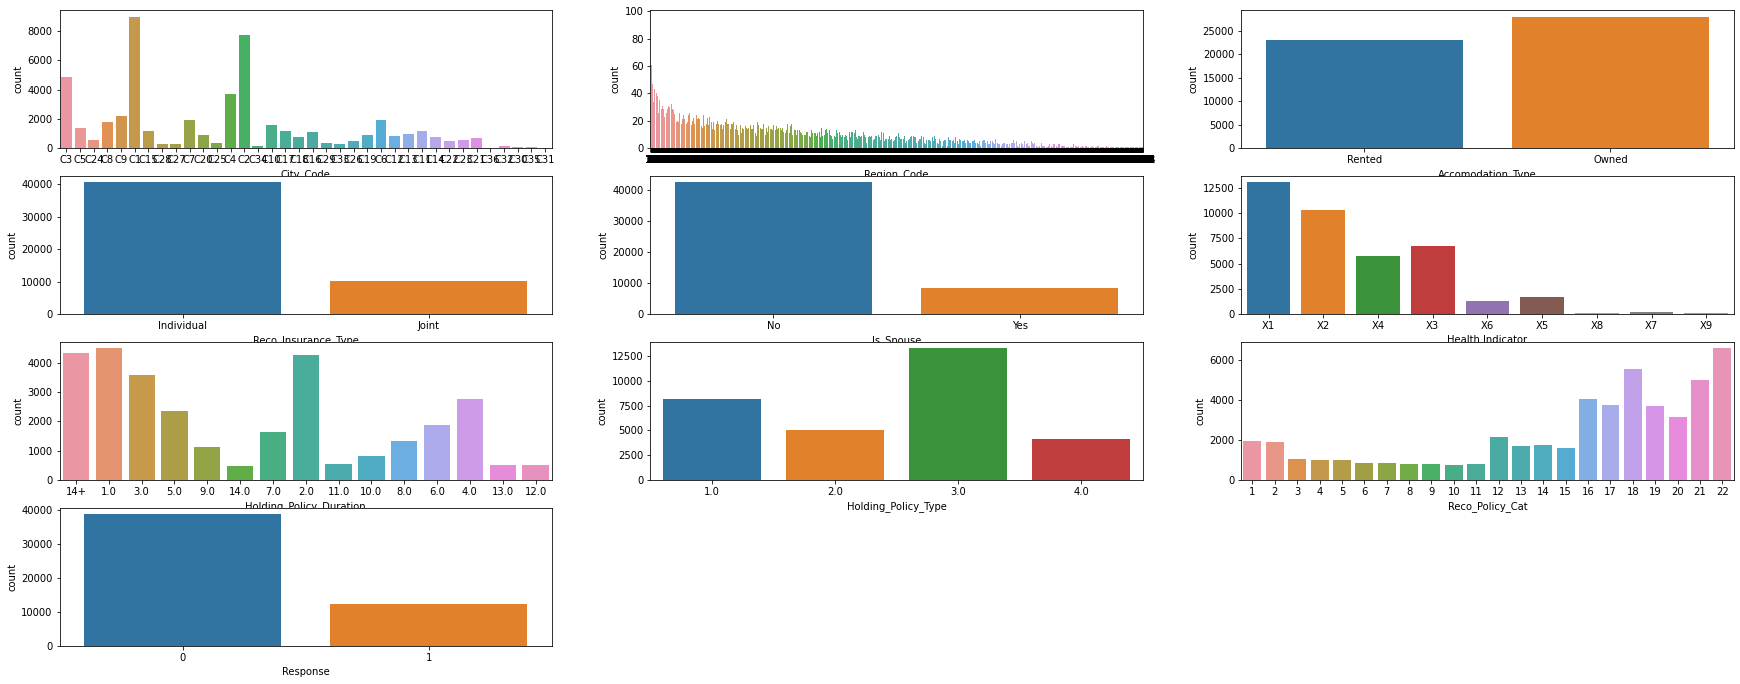

In [11]:
# distribution of categorical columns usinf countplot
plt.figure(figsize= (30,30))
plt.subplot(10,3,1)
sns.countplot(df.City_Code)

plt.subplot(10,3,2)
sns.countplot(df.Region_Code)

plt.subplot(10,3,3)
sns.countplot(df.Accomodation_Type)

plt.subplot(10,3,4)
sns.countplot(df.Reco_Insurance_Type)

plt.subplot(10,3,5)
sns.countplot(df.Is_Spouse)

plt.subplot(10,3,6)
sns.countplot(df['Health Indicator'])

plt.subplot(10,3,7)
sns.countplot(df.Holding_Policy_Duration)

plt.subplot(10,3,8)
sns.countplot(df.Holding_Policy_Type)

plt.subplot(10,3,9)
sns.countplot(df.Reco_Policy_Cat)

plt.subplot(10,3,10)
sns.countplot(df.Response)

plt.show()

**Explanation of each graph**:
* City code- almost uniformally distributed with peaks at C1 and C2
* region code- almost uniformaly distributed 
* accomodation type- people who owned accomodation were more than people who rented
* reco insurance type- people with individual account were more than people with joint account
* is spouse- there are more single people than married
* health indicator - maximum number of people have X1 category of health 
* holding policy duration- maximum number of people have policy for 1 year and minimum number of people are holding policy for 14 years
* holding policy type- maximum number of people are holding policy of type 3
* reco policy cat- uniformally distributed uptill type 15, and more people are having reco policy from type 16 to 22
* response- more number of people didnt showed interest in the health insurance policy

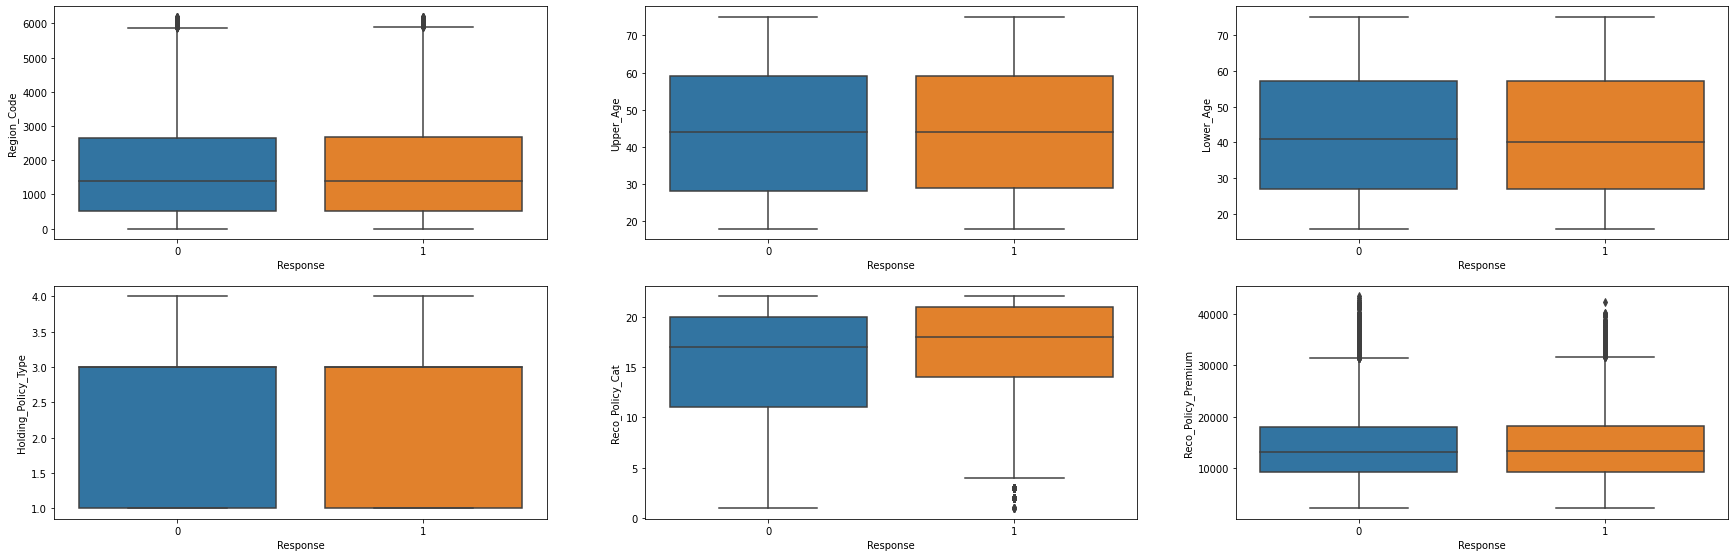

In [12]:
#boxplot representation of numeric variables
plt.figure(figsize= (30,30))

plt.subplot(6,3,1)
sns.boxplot(x=df.Response, y=df.Region_Code)

plt.subplot(6,3,2)
sns.boxplot(x=df.Response, y=df.Upper_Age)

plt.subplot(6,3,3)
sns.boxplot(x=df.Response, y=df.Lower_Age)

plt.subplot(6,3,4)
sns.boxplot(x=df.Response, y=df.Holding_Policy_Type)

plt.subplot(6,3,5)
sns.boxplot(x=df.Response, y=df.Reco_Policy_Cat)

plt.subplot(6,3,6)
sns.boxplot(x=df.Response, y=df.Reco_Policy_Premium)

plt.show()

**Explanation for each graph**:
* region code- people with and without interest are distributed uniformally over the region with with some outliers on the right side
* upper age- people with and without interest are distributed uniformally over the upper age with equal whiskers on both side
* lower age-people with and without interest are distributed uniformally over the lower age with equal whiskers on both side
* holding policy type- people who showed and did not showed interest are holding same policy type with whiskers only on right side
* reco policy cat- people who showed interest are having more reco policy type with outliers on the left side than people who did not showed ineterest
* reco policy premium- people who showed response have slightly more  annual premium of health insurance than people who did not showed interest with outliers on the right side.  

**Feature Engineering**

Checking the values in each categorical column to classify as nominal or ordinal

In [13]:
df['City_Code'].unique()  #nominal

array(['C3', 'C5', 'C24', 'C8', 'C9', 'C1', 'C15', 'C28', 'C27', 'C7',
       'C20', 'C25', 'C4', 'C2', 'C34', 'C10', 'C17', 'C18', 'C16', 'C29',
       'C33', 'C26', 'C19', 'C6', 'C12', 'C13', 'C11', 'C14', 'C22',
       'C23', 'C21', 'C36', 'C32', 'C30', 'C35', 'C31'], dtype=object)

In [14]:
df['Region_Code'].unique()    #nominal

array([3213, 1117, 3732, ..., 5326, 6149, 5450])

In [15]:
df['Accomodation_Type'].unique()    #nominal

array(['Rented', 'Owned'], dtype=object)

In [16]:
df['Reco_Insurance_Type'].unique()   #nominal 

array(['Individual', 'Joint'], dtype=object)

In [17]:
df['Is_Spouse'].unique()       #nominal

array(['No', 'Yes'], dtype=object)

In [18]:
df['Health Indicator'].unique()     #orninal

array(['X1', 'X2', nan, 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
      dtype=object)

In [19]:
df['Holding_Policy_Duration'].unique()            #ordinal

array(['14+', nan, '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0',
       '11.0', '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object)

In [20]:
df['Holding_Policy_Type'].unique()             #ordinal  

array([ 3., nan,  1.,  4.,  2.])

In [21]:
df['Reco_Policy_Cat'].unique()               #ordinal

array([22, 19, 16, 17,  1, 18, 21, 13, 20,  9,  2,  4, 12,  6, 14, 11,  3,
        8,  7, 10, 15,  5])

In [22]:
# removing the nan values with frequency encoder
df['Health Indicator'] = df['Health Indicator'].fillna(df['Health Indicator'].value_counts().index[0])
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].fillna(df['Holding_Policy_Duration'].value_counts().index[0])
df['Holding_Policy_Type'] = df['Holding_Policy_Type'].fillna(df['Holding_Policy_Type'].value_counts().index[0])


**Encoding ordinal columns**
* health indicator- label encoder
* holding policy duration - label encoder
* holding policy type -  label encoder
* repo policy cat -  label encoder

In [23]:
df.loc[:,['Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type','Reco_Policy_Cat']]= df.loc[:,['Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type','Reco_Policy_Cat']].apply(LabelEncoder().fit_transform)

In [24]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,0,5,2,21,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,1,0,2,21,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,0,0,0,18,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,0,5,2,18,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,1,8,0,15,10404.0,0


In [25]:
df.corr()    # calculating correlation among all the variables 

,ID,Region_Code,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
ID,1.000000,-0.000465,-0.001725,0.001101,0.001563,0.002370,0.004605,-0.002235,-0.002350,0.005159
Region_Code,-0.000465,1.000000,-0.005649,-0.005928,0.017058,0.006674,0.009348,-0.065120,-0.010797,0.001121
Upper_Age,-0.001725,-0.005649,1.000000,0.921392,0.019547,0.228720,0.002579,0.025257,0.792689,0.002772
Lower_Age,0.001101,-0.005928,0.921392,1.000000,0.014362,0.208557,-0.001842,0.021163,0.615739,-0.002099
Health Indicator,0.001563,0.017058,0.019547,0.014362,1.000000,0.008110,0.029842,-0.004402,0.033874,0.002239
Holding_Policy_Duration,0.002370,0.006674,0.228720,0.208557,0.008110,1.000000,-0.197835,0.022466,0.176176,0.005422
Holding_Policy_Type,0.004605,0.009348,0.002579,-0.001842,0.029842,-0.197835,1.000000,0.053760,0.012266,0.006208
Reco_Policy_Cat,-0.002235,-0.065120,0.025257,0.021163,-0.004402,0.022466,0.053760,1.000000,0.060989,0.114321
Reco_Policy_Premium,-0.002350,-0.010797,0.792689,0.615739,0.033874,0.176176,0.012266,0.060989,1.000000,0.007943
Response,0.005159,0.001121,0.002772,-0.002099,0.002239,0.005422,0.006208,0.114321,0.007943,1.000000


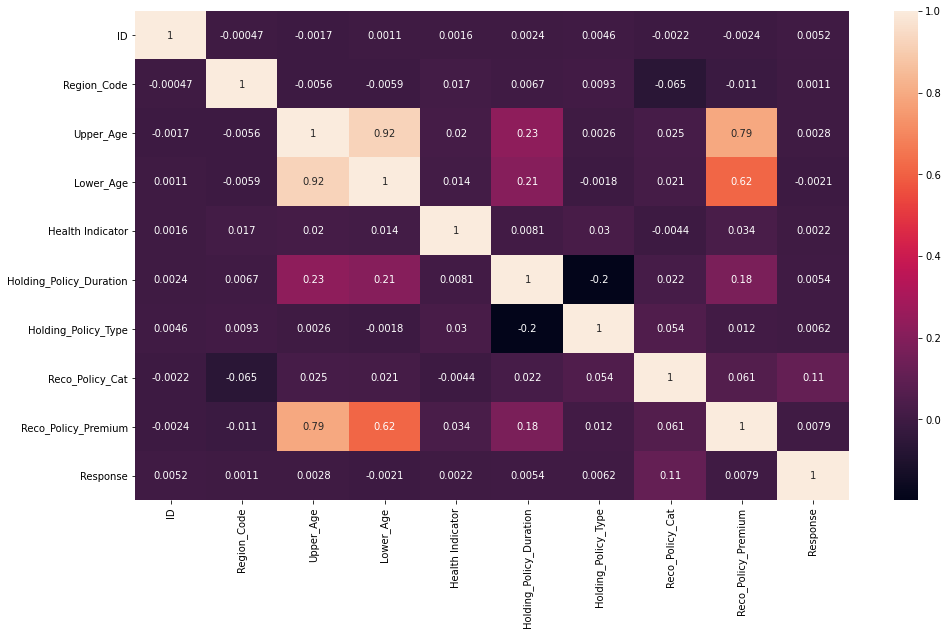

In [26]:
# plotting correlation data with heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)

* The target column has maximum correlation with reco policy premium
* The target column has minimum correlation with region code , hence we will drop this variable


<Figure size 1152x648 with 0 Axes>

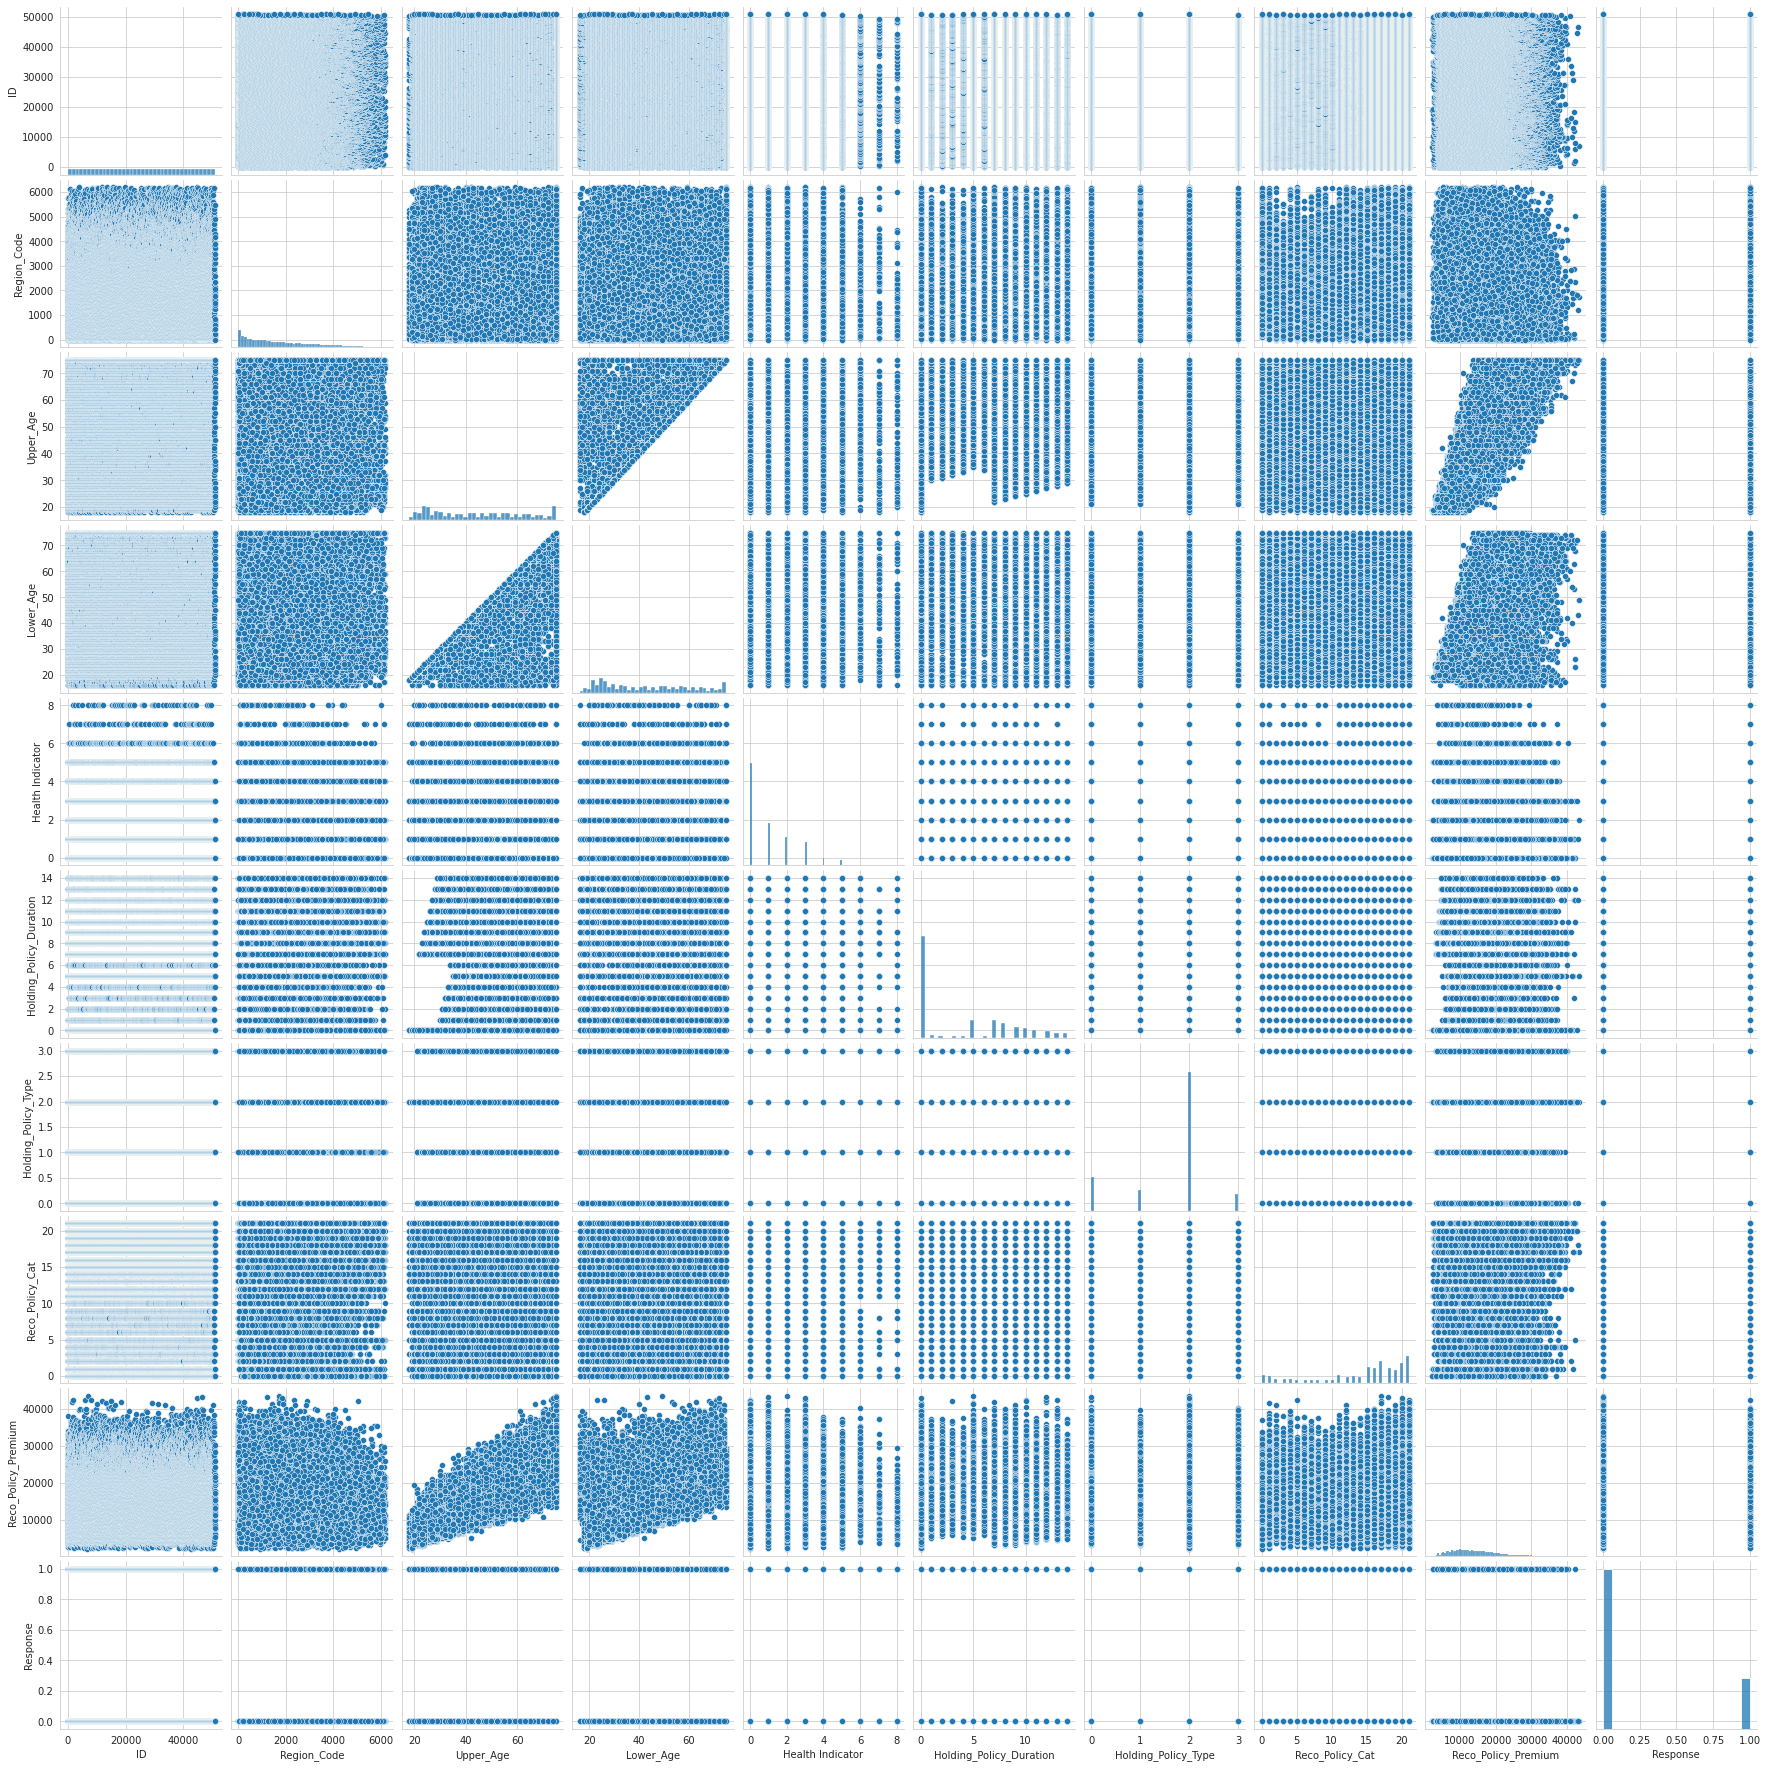

In [ ]:
#plotting the relation of all varibles with each other through pairplot
plt.figure(figsize=(16,9))
sns.pairplot(df)

Upper age and reco policy premium are somewhat linearly related.

**Encoding nominal columns** :
* accomodation type - dummy encoder
* reco insurance type  - dummy encoder
* is spouse -  dummy encoder

In [27]:
#applying get_dummies
accomodation=pd.get_dummies(df['Accomodation_Type'], prefix='Accomodation')
reco_insurance= pd.get_dummies(df['Reco_Insurance_Type'], prefix='Reco_Insurance')
spouse= pd.get_dummies(df['Is_Spouse'], prefix='Spouse')

In [28]:
# concatinating the created dummy variables with original dataframe
df=pd.concat([df,accomodation, reco_insurance, spouse], axis=1)
df.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response',
       'Accomodation_Owned', 'Accomodation_Rented',
       'Reco_Insurance_Individual', 'Reco_Insurance_Joint', 'Spouse_No',
       'Spouse_Yes'],
      dtype='object')

In [29]:
# dropping the original ordinal columns
df.drop(['Accomodation_Type','Reco_Insurance_Type', 'Is_Spouse'], axis = 1, inplace = True)

dropping irrelevant variables from the dataframe, as they have no strong correlation with the Response column

In [30]:
df.drop(['ID','City_Code','Region_Code'], axis = 1, inplace = True)

In [31]:
df.head()

,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_Owned,Accomodation_Rented,Reco_Insurance_Individual,Reco_Insurance_Joint,Spouse_No,Spouse_Yes
0,36,36,0,5,2,21,11628.0,0,0,1,1,0,1,0
1,75,22,1,0,2,21,30510.0,0,1,0,0,1,1,0
2,32,32,0,0,0,18,7450.0,1,1,0,1,0,1,0
3,52,48,0,5,2,18,17780.0,0,1,0,0,1,1,0
4,44,44,1,8,0,15,10404.0,0,0,1,1,0,1,0


Now our datset is ready for model training.

**Splitting the data** in *70:30* ratio of training and testing set 

In [32]:
x=df.drop(['Response'],axis=1)
y=df['Response']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=1)

**Machine Learning**- Applying various models through pipelining  with standardscaler

**Model 1- LogisticRegression**

In [33]:
#Standard scaler is used to remover outliers , and make our data normally distributed
lgr=Pipeline([("scaler",StandardScaler()),("lgr",LogisticRegression(solver="liblinear"))]) 
lgr.fit(x_train,y_train)
y_pred=lgr.predict(x_test)

In [34]:
print("Classification report :\n",metrics.classification_report(y_test,y_pred))       #Classification report
print("Confusion matrix :\n",metrics.confusion_matrix(y_test,y_pred))                #Confusion matrix
print("Accuracy score :",metrics.accuracy_score(y_test,y_pred))              #Accuracy score
print("Roc_Auc_Score :",roc_auc_score(y_test,y_pred))                    #roc_auc_score

Classification report :
               precision    recall  f1-score   support

           0       0.76      1.00      0.86     11552
           1       0.00      0.00      0.00      3713

    accuracy                           0.76     15265
   macro avg       0.38      0.50      0.43     15265
weighted avg       0.57      0.76      0.65     15265

Confusion matrix :
 [[11552     0]
 [ 3713     0]]
Accuracy score : 0.7567638388470357
Roc_Auc_Score : 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# calculating area under the curve
lgr_prob= lgr.predict_proba(x_test)
fpr1,tpr1,thresholds1=roc_curve(y_test,lgr_prob[:,1])
area1=auc(fpr1,tpr1)
print("area under the curve: %f"% area1)

area under the curve: 0.566964


**Model 2 - Gaussian Naive Bayes**

In [36]:
gnb=Pipeline([("scaler",StandardScaler()),("gnb",GaussianNB())])
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)

In [37]:
print("Classification report :\n",metrics.classification_report(y_test,y_pred))
print("Confusion matrix :\n",metrics.confusion_matrix(y_test,y_pred))
print("Accuracy score :",metrics.accuracy_score(y_test,y_pred))
print("Roc_Auc_Score :",roc_auc_score(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.76      1.00      0.86     11552
           1       0.00      0.00      0.00      3713

    accuracy                           0.76     15265
   macro avg       0.38      0.50      0.43     15265
weighted avg       0.57      0.76      0.65     15265

Confusion matrix :
 [[11552     0]
 [ 3713     0]]
Accuracy score : 0.7567638388470357
Roc_Auc_Score : 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# calculating area under the curve
gnb_prob=gnb.predict_proba(x_test)
fpr2,tpr2,thresholds2=roc_curve(y_test,gnb_prob[:,1])
area2=auc(fpr2,tpr2)
print("area under the curve: %f"% area2)

area under the curve: 0.556427


**Model 3- K Nearest Neighbors**

In [39]:
knn=Pipeline([("scaler",StandardScaler()),("knn",KNeighborsClassifier())])
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [40]:
print("Classification report :\n",metrics.classification_report(y_test,y_pred))
print("Confusion matrix :\n",metrics.confusion_matrix(y_test,y_pred))
print("Accuracy score :",metrics.accuracy_score(y_test,y_pred))
print("Roc_Auc_Score :",roc_auc_score(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.76      0.90      0.83     11552
           1       0.29      0.13      0.18      3713

    accuracy                           0.71     15265
   macro avg       0.53      0.51      0.50     15265
weighted avg       0.65      0.71      0.67     15265

Confusion matrix :
 [[10405  1147]
 [ 3242   471]]
Accuracy score : 0.7124795283327874
Roc_Auc_Score : 0.5137807181363974


In [41]:
# calculating area under the curve
knn_prob=knn.predict_proba(x_test)
fpr3,tpr3,thresholds3=roc_curve(y_test,knn_prob[:,1])
area3=auc(fpr3,tpr3)
print("area under the curve: %f"% area3)

area under the curve: 0.545267


**Model 4 - Random Forest Classifier**

In [42]:
forest_c =Pipeline([("scaler",StandardScaler()), ("rfc",RandomForestClassifier(n_estimators=7))])
forest_c.fit(x_train,y_train)
y_pred=forest_c.predict(x_test)

In [43]:
print("Classification report :\n",metrics.classification_report(y_test,y_pred))
print("Confusion matrix :\n",metrics.confusion_matrix(y_test,y_pred))
print("Accuracy score :",metrics.accuracy_score(y_test,y_pred))
print("Roc_Auc_Score :",roc_auc_score(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.77      0.88      0.82     11552
           1       0.31      0.16      0.21      3713

    accuracy                           0.71     15265
   macro avg       0.54      0.52      0.52     15265
weighted avg       0.65      0.71      0.67     15265

Confusion matrix :
 [[10185  1367]
 [ 3107   606]]
Accuracy score : 0.7069112348509663
Roc_Auc_Score : 0.522437927253425


In [44]:
# calculating area under the curve
forestc_prob= forest_c.predict_proba(x_test)
fpr4,tpr4,thresholds4=roc_curve(y_test,forestc_prob[:,1])
area4=auc(fpr4,tpr4)
print("area under the curve: %f"% area4)

area under the curve: 0.560768


**Model 5 - Random Forest Regressor**

In [45]:
forest_r = Pipeline([("scaler",StandardScaler()), ("rfr",RandomForestRegressor(n_estimators=7))])
forest_r.fit(x_train,y_train)
y_pred=forest_r.predict(x_test)

In [46]:
print("Roc_Auc_Score :",roc_auc_score(y_test,y_pred))

Roc_Auc_Score : 0.5839188814399956


In [47]:
# calculating area under the curve
fpr5,tpr5,thresholds5=roc_curve(y_test,y_pred)
area5=auc(fpr5,tpr5)
print("area under the curve: %f"% area5)

area under the curve: 0.583919


**Model 6 - Decision Tree Classifier**

In [48]:
tree_c=Pipeline([("scaler",StandardScaler()), ("dtr",DecisionTreeClassifier(max_depth=10))])
tree_c.fit(x_train,y_train)
y_pred=tree_c.predict(x_test)

In [49]:
print("Classification report :\n",metrics.classification_report(y_test,y_pred))
print("Confusion matrix :\n",metrics.confusion_matrix(y_test,y_pred))
print("Accuracy score :",metrics.accuracy_score(y_test,y_pred))
print("Roc_Auc_Score :",roc_auc_score(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.76      0.98      0.86     11552
           1       0.35      0.03      0.06      3713

    accuracy                           0.75     15265
   macro avg       0.55      0.51      0.46     15265
weighted avg       0.66      0.75      0.66     15265

Confusion matrix :
 [[11313   239]
 [ 3586   127]]
Accuracy score : 0.7494267933180478
Roc_Auc_Score : 0.5067575447089026


In [50]:
# calculating area under the curve
treec_prob= tree_c.predict_proba(x_test)
fpr6,tpr6,thresholds6=roc_curve(y_test,treec_prob[:,1])
area6=auc(fpr6,tpr6)
print("area under the curve: %f"% area6)

area under the curve: 0.631239


**Model 7 - Decision Tree Regressor**

In [51]:
tree_r=Pipeline([("scaler",StandardScaler()),("dtr", DecisionTreeRegressor(max_depth=10))])
tree_r.fit(x_train,y_train)
y_pred=tree_r.predict(x_test)

In [52]:
print("Roc_Auc_Score :",roc_auc_score(y_test,y_pred))

Roc_Auc_Score : 0.6314813547220853


In [53]:
# calculating area under the curve
fpr7,tpr7,thresholds7=roc_curve(y_test,y_pred)
area7=auc(fpr7,tpr7)
print("area under the curve: %f"% area7)

area under the curve: 0.631481


The **maximum Roc_auc_score** and hence the area under curve is given by **Decision Tree Regressor with 63.15** on testing data

Plotting together the Area under curve for each model

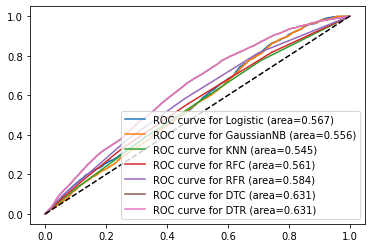

In [54]:
import pylab as pl
pl.clf()
pl.plot(fpr1,tpr1,label='ROC curve for Logistic (area=%0.3f)' % area1)
pl.plot(fpr2,tpr2,label='ROC curve for GaussianNB (area=%0.3f)' % area2)
pl.plot(fpr3,tpr3,label='ROC curve for KNN (area=%0.3f)' % area3)
pl.plot(fpr4,tpr4,label='ROC curve for RFC (area=%0.3f)' % area4)
pl.plot(fpr5,tpr5,label='ROC curve for RFR (area=%0.3f)' % area5)
pl.plot(fpr6,tpr6,label='ROC curve for DTC (area=%0.3f)' % area6)
pl.plot(fpr7,tpr7,label='ROC curve for DTR (area=%0.3f)' % area7)
pl.plot([0,1],[0,1],'k--')
pl.legend(loc="lower right")
pl.show()

Area under curve of model in decreasing order:
DT regressor > DT Classifier > Logistic > Random forest classifier > Gaussian naive bayes > KNN  

**Working with Test Dataset**

In [55]:
#importing and reading the test dataset
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Job-a-thon/test_YCcRUnU.csv')
ID_test= test['ID']
test.head()           #displaying the first 10 variables

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [56]:
# removing the nan values with frequency encoder
test['Health Indicator'] = test['Health Indicator'].fillna(test['Health Indicator'].value_counts().index[0])
test['Holding_Policy_Duration'] = test['Holding_Policy_Duration'].fillna(test['Holding_Policy_Duration'].value_counts().index[0])
test['Holding_Policy_Type'] = test['Holding_Policy_Type'].fillna(test['Holding_Policy_Type'].value_counts().index[0])


In [57]:
#applying get_dummies to nominal variables
accomodation=pd.get_dummies(test['Accomodation_Type'], prefix='Accomodation')
reco_insurance= pd.get_dummies(test['Reco_Insurance_Type'], prefix='Reco_Insurance')
spouse= pd.get_dummies(test['Is_Spouse'], prefix='Spouse')

In [58]:
#concatinating the created dummy variables with original dataframe
test=pd.concat([test,accomodation, reco_insurance, spouse], axis=1)
test.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Accomodation_Owned',
       'Accomodation_Rented', 'Reco_Insurance_Individual',
       'Reco_Insurance_Joint', 'Spouse_No', 'Spouse_Yes'],
      dtype='object')

In [59]:
# dropping the original ordinal columns
test.drop(['Accomodation_Type','Reco_Insurance_Type', 'Is_Spouse'], axis = 1, inplace = True)

In [60]:
#dropping irrelevant variables from the dataframe, as they have no strong correlation with the Response column
test.drop(['ID','City_Code','Region_Code'], axis = 1, inplace = True)

In [61]:
# applying labelencoder to ordinal variables
test.loc[:,['Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type','Reco_Policy_Cat']]= test.loc[:,['Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type','Reco_Policy_Cat']].apply(LabelEncoder().fit_transform)

In [62]:
test.head()

,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Accomodation_Owned,Accomodation_Rented,Reco_Insurance_Individual,Reco_Insurance_Joint,Spouse_No,Spouse_Yes
0,30,30,0,11,2,4,11934.0,1,0,1,0,1,0
1,69,68,0,8,2,17,32204.8,1,0,0,1,0,1
2,28,28,2,7,3,16,9240.0,0,1,1,0,1,0
3,23,23,2,8,2,17,9086.0,0,1,1,0,1,0
4,75,75,2,5,2,4,22534.0,1,0,1,0,1,0


prepairing the x_train , y_train and x_test data

In [63]:
x_train=df.drop(['Response'],axis=1)
y_train=df['Response']
x_test=test

Since we achieved our maximum roc_auc_score for validation data with Decision Tree Regressor, we are applying only this model to our final testing data

In [65]:
tree_pipe=Pipeline([("scaler",StandardScaler()),("dtr",DecisionTreeRegressor(max_depth=10))])
tree_pipe.fit(x_train,y_train)
y_pred=tree_pipe.predict(x_test)

In [66]:
submit = pd.DataFrame({'ID':ID_test, 'Response':y_pred})
submit

,ID,Response
0,50883,0.502924
1,50884,0.249599
2,50885,0.278518
3,50886,0.249599
4,50887,0.330189
...,...,...
21800,72683,0.217617
21801,72684,0.249599
21802,72685,0.000000
21803,72686,0.322366


creating the csv file of y_pred

In [67]:
submit.to_csv('submit.csv')